## Data import, cleanup and EDA on Auto MPG Data Set

#### Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


#### Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

#### Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [23]:
# column names

cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [28]:
import urllib

In [42]:
file = urllib.request.urlopen(url)

In [35]:
import re

In [43]:
for line in file:
    decoded_line = line.decode('utf-8')
    test = decoded_line

In [44]:
test

'31.0   4   119.0      82.00      2720.      19.4   82  1\t"chevy s-10"\n'

In [70]:
re.findall('(\d+\.\d+)\s+(\d)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.)\s+(\d+\.\d+)\s+(\d+)\s+(\d).+"(.+)"', test)

[('31.0', '4', '119.0', '82.00', '2720.', '19.4', '82', '1', 'chevy s-10')]

In [71]:
# regex pattern to get all the required info

patt = '(\d+\.\d+)\s+(\d)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.)\s+(\d+\.\d+)\s+(\d+)\s+(\d).+"(.+)"'

In [77]:
'''create lists of values, to be used for a DataFrame'''

file = urllib.request.urlopen(url)

mpg = []
cylinders = []
displacement = []
horsepower = []
weight = []
acceleration = []
model_year = []
origin = []
car_name = []

containers = [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]

for line in file:
    decoded_line = line.decode('utf-8')
    regex = re.findall(patt, decoded_line)
    if len(regex) > 0:
        info = regex[0]
    for idx, container in zip(range(9), containers):
        container.append(info[idx])
        

In [80]:
# make a dictionary with column names and data

data_dict = {col:cont for col,cont in zip(cols, containers)}


In [82]:
# make the dataframe

car_mpg = pd.DataFrame(data_dict)

In [83]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [94]:
# first word in the car name should be the brand

car_mpg['brand'] = car_mpg['car name'].str.split().apply(lambda x: x[0])

In [100]:
# everything else is a model

car_mpg['model'] = car_mpg['car name'].str.split().apply(lambda x: ' '.join(x[1:]))

In [104]:
# make model years

car_mpg['model year'] = car_mpg['model year'].apply(lambda x: 1900+int(x))

In [106]:
# data is in string format, make floats

for col in ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']:
    car_mpg[col] = car_mpg[col].apply(lambda x: float(x))

In [107]:
# cylinders are integers :)

car_mpg['cylinders'] = car_mpg['cylinders'].apply(lambda x: int(x))

In [117]:
# encode the car origin

origins = {'1':'america', '2': 'europe', '3': 'asia'}

In [114]:
# encode origin

car_mpg['origin'] = car_mpg['origin'].apply(lambda x: origins[x])

In [118]:
# some misspellings and other mistakes (hi? capri?)

car_mpg['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [120]:
# wikipedia says it's an IH pickup truck

car_mpg[car_mpg['brand']== 'hi']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,model
28,9.0,8,304.0,193.0,4732.0,18.5,1970,America,hi 1200d,hi,1200d


In [123]:
# this is a ford, capri is a model

car_mpg[car_mpg['brand']== 'capri']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,model
184,25.0,4,140.0,92.0,2572.0,14.9,1976,America,capri ii,capri,ii


In [128]:
# correct the brand names

corrections = {'chevy': 'chevrolet',
               'maxda':'mazda',
               'chevroelt': 'chevrolet',
               'mercedes-benz': 'mercedes',
               'toyouta': 'toyota',
               'vokswagen': 'volkswagen',
               'vw': 'volkswagen',
              'hi': 'international harvester',
              'capri': 'ford'}

for key in corrections.keys():
    car_mpg.loc[car_mpg['brand'] == key, 'brand'] = corrections[key]
    

In [129]:
car_mpg['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'international harvester', 'mercury', 'opel',
       'fiat', 'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault',
       'honda', 'subaru', 'mercedes', 'cadillac', 'triumph', 'nissan'],
      dtype=object)

In [134]:
# correct the capri

car_mpg.loc[car_mpg['model'] == 'ii', 'model'] = 'capri ii'

In [136]:
# convert to SI units

pound = 0.45359237 # kilograms
cubicinch = 16.387064 # cubic centimeters
mpg = 235 # 235/mpgUS = L/100km 

car_mpg['weight_kg'] = car_mpg['weight']*pound

car_mpg['displacement_ccm'] = car_mpg['displacement']*cubicinch

car_mpg['liters_per_100km'] = 235/car_mpg['mpg']

In [140]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,model,weight_kg,displacement_ccm,liters_per_100km
0,18.0,8,307.0,130.0,3504.0,12.0,1970,America,chevrolet chevelle malibu,chevrolet,chevelle malibu,1589.387664,5030.828648,13.055556
1,15.0,8,350.0,165.0,3693.0,11.5,1970,America,buick skylark 320,buick,skylark 320,1675.116622,5735.472400,15.666667
2,18.0,8,318.0,150.0,3436.0,11.0,1970,America,plymouth satellite,plymouth,satellite,1558.543383,5211.086352,13.055556
3,16.0,8,304.0,150.0,3433.0,12.0,1970,America,amc rebel sst,amc,rebel sst,1557.182606,4981.667456,14.687500
4,17.0,8,302.0,140.0,3449.0,10.5,1970,America,ford torino,ford,torino,1564.440084,4948.893328,13.823529


In [150]:
# reorded the columns and get rid of what we don't need

cars = car_mpg[['brand', 'model', 'model year', 'origin', 'cylinders', 'displacement_ccm', 'horsepower', 'acceleration', 'weight_kg', 'liters_per_100km']]

In [151]:
cars.head()

,brand,model,model year,origin,cylinders,displacement_ccm,horsepower,acceleration,weight_kg,liters_per_100km
0,chevrolet,chevelle malibu,1970,america,8,5030.828648,130.0,12.0,1589.387664,13.055556
1,buick,skylark 320,1970,america,8,5735.472400,165.0,11.5,1675.116622,15.666667
2,plymouth,satellite,1970,america,8,5211.086352,150.0,11.0,1558.543383,13.055556
3,amc,rebel sst,1970,america,8,4981.667456,150.0,12.0,1557.182606,14.687500
4,ford,torino,1970,america,8,4948.893328,140.0,10.5,1564.440084,13.823529


In [160]:
# some analysis: by year and by origin

cars.groupby(['model year', 'origin']).median().round(1)

cylinders  displacement_ccm  horsepower  acceleration  \
model year origin                                                           
1970       america        8.0            5391.3       167.5          11.2   
           asia           4.0            1720.6        91.5          14.8   
           europe         4.0            1753.4        90.0          17.5   
1971       america        6.0            4096.8       100.0          14.0   
           asia           4.0            1589.5        88.0          14.5   
           europe         4.0            1515.8        73.0          16.8   
1972       america        8.0            5121.0       150.0          13.5   
           asia           4.0            1589.5        95.0          15.5   
           europe         4.0            1966.4        76.0          18.0   
1973       america        8.0            5735.5       150.0          13.0   
           asia           4.0            1679.7        92.0          15.0   
           europe         4.0            1868.1        90.0          15.5   
1974       america        6.0            4096.8       100.0          16.5   
           asia           4.0            1327.4        66.0          17.8   
           europe         4.0            1532.2        75.0          15.5   
1975       america        6.0            4096.8       105.0          16.0   
           asia           4.0            1769.8        85.5          16.5   
           europe         4.0            1925.5        91.5          14.8   
1976       america        6.0            4096.8       102.5          15.0   
           asia           4.0            1540.4        72.5          16.7   
           europe         4.0            1827.2        84.5          15.6   
1977       america        6.0            4096.8       107.5          15.6   
           asia           4.0            1589.5        72.5          16.6   
           europe         4.0            1589.5        78.0          14.3   
1978       america        6.0            3736.3       105.0          15.6   
           asia           4.0            1778.0        82.5          15.6   
           europe         4.5            2064.8       109.0          15.8   
1979       america        6.0            3785.4       115.0          15.0   
           asia           4.0            1401.1        65.0          17.2   
           europe         4.0            1900.9        71.0          17.4   
1980       america        4.0            2474.4        90.0          17.3   
           asia           4.0            1540.4        69.5          16.0   
           europe         4.0            1605.9        67.0          15.8   
1981       america        4.0            2474.4        84.0          16.2   
           asia           4.0            1671.5        71.0          16.5   
           europe         4.0            2015.6        75.0          16.9   
1982       america        4.0            2212.3        87.0          16.4   
           asia           4.0            1491.2        68.0          15.0   
           europe         4.0            1655.1        63.0          20.0   

                    weight_kg  liters_per_100km  
model year origin                                
1970       america     1656.1              15.7  
           asia        1021.0               9.2  
           europe      1077.3               9.4  
1971       america     1497.8              13.1  
           asia         966.2               8.7  
           europe       938.7               8.1  
1972       america     1865.9              16.8  
           asia        1037.8               9.8  
           europe      1139.0              10.7  
1973       america     1808.9              16.8  
           asia        1056.4              11.8  
           europe      1027.4               9.8  
1974       america     1638.8              14.7  
           asia         896.5               7.6  
           europe       981.3               9.0  
1975       a

In [162]:
# probably would make more sense to skip year and cylinders

cars.groupby(['origin', 'brand']).median().round(1)

model year  cylinders  displacement_ccm  \
origin  brand                                                              
america amc                          1974.0        6.0            3801.8   
        buick                        1977.0        6.0            3785.4   
        cadillac                     1977.5        8.0            5735.5   
        chevrolet                    1975.0        6.0            4096.8   
        chrysler                     1979.0        8.0            5899.3   
        dodge                        1977.0        6.0            3687.1   
        ford                         1975.0        6.0            4096.8   
        international harvester      1970.0        8.0            4981.7   
        mercury                      1977.0        6.0            4096.8   
        oldsmobile                   1978.0        8.0            4277.0   
        plymouth                     1974.5        6.0            3687.1   
        pontiac                      1975.5        6.0            4096.8   
asia    datsun                       1978.0        4.0            1589.5   
        honda                        1980.0        4.0            1491.2   
        mazda                        1980.0        4.0            1409.3   
        nissan                       1982.0        4.0            1966.4   
        subaru                       1978.5        4.0            1589.5   
        toyota                       1975.5        4.0            1810.8   
europe  audi                         1975.0        4.0            1868.1   
        bmw                          1973.5        4.0            1982.8   
        fiat                         1974.0        4.0            1483.0   
        mercedes                     1979.0        5.0            2753.0   
        opel                         1973.5        4.0            1900.9   
        peugeot                      1975.5        4.0            1966.4   
        renault                      1976.0        4.0            1573.2   
        saab                         1974.0        4.0            1982.8   
        triumph                      1980.0        4.0            1999.2   
        volkswagen                   1977.0        4.0            1589.5   
        volvo                        1975.5        4.0            2056.6   

                                 horsepower  acceleration  weight_kg  \
origin  brand                                                          
america amc                           100.0          15.5     1456.5   
        buick                         110.0          14.9     1553.6   
        cadillac                      152.5          14.8     1877.9   
        chevrolet                     105.0          15.5     1520.9   
        chrysler                      150.0          13.0     1787.2   
        dodge                         107.5          14.4     1537.7   
        ford                           92.0          15.5     1423.8   
        international harvester       193.0          18.5     2146.4   
        mercury                       107.0          14.0     1556.7   
        oldsmobile                    110.0          16.2     1606.6   
        plymouth                      100.0          15.4     1473.5   
        pontiac                       112.5          14.1     1628.4   
asia    datsun                         88.0          16.5      966.2   
        honda                          67.0          15.7      891.3   
        mazda                          71.0          16.8      960.3   
        nissan                         88.0          14.5      979.8   
        subaru                         67.0          17.1      954.8   
        toyota                         89.0          15.5     1030.3   
europe  audi                           90.0          15.8     1171.2   
        bmw                           111.5          12.6     1096.3   
        fiat                           75.0          15.5      961.2   
        mercedes    

In [164]:
import matplotlib.pyplot as plt

In [175]:
median_consumption = cars.groupby('origin')['liters_per_100km'].median()

In [176]:
median_consumption.index

Index(['america', 'asia', 'europe'], dtype='object', name='origin')

<BarContainer object of 3 artists>

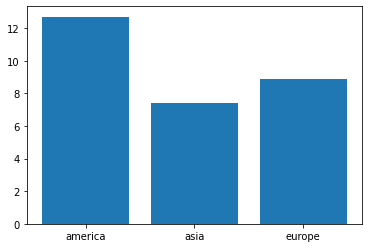

In [177]:
plt.bar(median_consumption.index, median_consumption)